In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

In [59]:
df1 = pd.DataFrame({'node':['1','2','3','4','5','6','7']})
df1

,node
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [60]:
df2 = pd.DataFrame({
    'source':['1','1','1','2','3','2','3','3','3','4','5','6','5','6'],
    'destination':['2','3','4','3','2','5','4','5','6','6','6','5','7','7'],
    'capacity':[5000,6000,5000,2000,2000,3000,3000,3000,7000,5000,1000,1000,8000,7000]})
#pd.merge(left=df2,right=df1,how='left',left_on='source',right_on='source_node')
df2

,source,destination,capacity
0,1,2,5000
1,1,3,6000
2,1,4,5000
3,2,3,2000
4,3,2,2000
5,2,5,3000
6,3,4,3000
7,3,5,3000
8,3,6,7000
9,4,6,5000


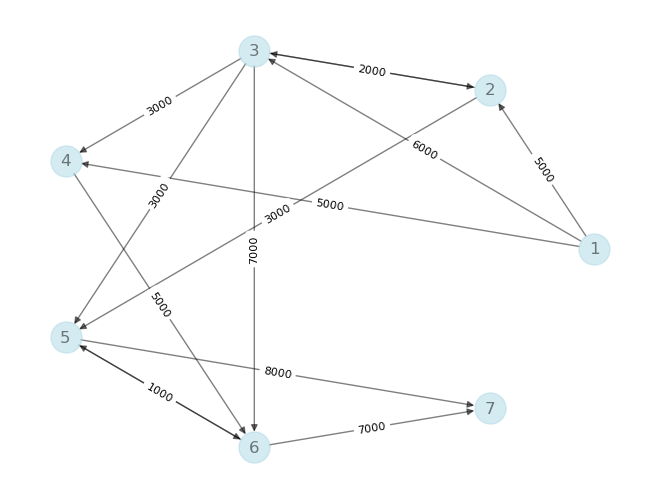

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Create a directed graph (DiGraph)
G = nx.DiGraph()

# Add nodes with demand as node attribute
for _, row in df1.iterrows():
    G.add_node(row['node'])


# Add edges with weights (costs)
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['destination'], capacity=row['capacity'])

# Create a layout for the nodes
pos = nx.circular_layout(G)

# Draw the nodes with labels (including demand values)
node_labels = {node: f"{node}" for node in G.nodes()}
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='lightblue',alpha=0.5)

# Draw the edges with weights as labels
edge_labels = {(edge[0], edge[1]): G[edge[0]][edge[1]]['capacity'] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the graph
plt.show()

In [62]:
G = nx.DiGraph()
# Add nodes with demands
for _, row in df1.iterrows():
    
    G.add_node(row['node'])

# Add edges with weights (costs)
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['destination'], capacity=row['capacity'])
# Find the maximum flow using the Ford-Fulkerson algorithm
source = "1"
sink = "7"

max_flow, flowDict = nx.maximum_flow(G, source, sink)
print(flowDict)
print(max_flow)

{'1': {'2': 5000, '3': 4000, '4': 5000}, '2': {'3': 2000, '5': 3000}, '3': {'2': 0, '4': 0, '5': 3000, '6': 3000}, '4': {'6': 5000}, '5': {'6': 0, '7': 7000}, '6': {'5': 1000, '7': 7000}, '7': {}}
14000


In [63]:
import pandas as pd

# Convert the flowDict dictionary to a DataFrame
df = pd.DataFrame.from_dict(flowDict, orient='index').fillna(0)

# Reset the index to have 'source' as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'source'}, inplace=True)

# Melt the DataFrame to have 'source', 'destination', and 'flow' columns
df_melted = pd.melt(df, id_vars='source', var_name='destination', value_name='flow')
df_melted=df_melted[df_melted['flow']!=0]
df_melted=pd.merge(left=df_melted,right=df2,how='inner',on=['source','destination'])
df_melted

,source,destination,flow,capacity
0,1,2,5000.0,5000
1,1,3,4000.0,6000
2,2,3,2000.0,2000
3,1,4,5000.0,5000
4,3,5,3000.0,3000
5,2,5,3000.0,3000
6,6,5,1000.0,1000
7,3,6,3000.0,7000
8,4,6,5000.0,5000
9,6,7,7000.0,7000


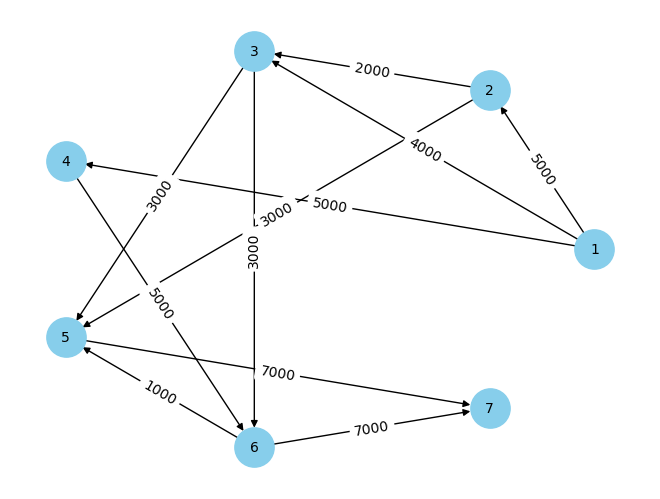

In [65]:
# Create an empty directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = flowDict.keys()
G.add_nodes_from(nodes)

# Add edges with non-zero values
for source, destinations in flowDict.items():
    for destination, value in destinations.items():
        if value != 0:
            G.add_edge(source, destination, capacity=value)

# Draw the graph
pos = nx.circular_layout(G)  # You can choose a different layout if you prefer
edge_labels = {(u, v): G[u][v]['capacity'] for u, v in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()